### Importing required libraries

##### The pandas library is used for data manipulation and analysis. It provides data structures like DataFrame and Series, which allow for easy handling and manipulation of structured data. pandas offers functions for data cleaning, transformation, filtering, and aggregation. It is widely used for data preprocessing and exploratory data analysis.

##### The matplotlib.pyplot module is a sub-module of the Matplotlib library, which is a powerful plotting library in Python. The pyplot module provides a collection of functions that allow you to create a wide range of plots, including line plots, scatter plots, bar plots, histograms, and more. It provides full control over the appearance and customization of the plots.

##### The numpy library is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently. numpy is widely used for numerical computations, data manipulation, and scientific computing tasks.

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset to working
#### For the topic I have selected next source https://www.kaggle.com/datasets/joonasyoon/github-topics

In [311]:
df = pd.read_csv("https://joseiguti.com/machinelearning/fifa_ranking-2022-12-22.csv")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 64127
Columns: 8


In [312]:
desired_columns = ['rank', 'country_full', 'total_points', 'previous_points', 'rank_change', 'confederation', 'rank_date']

df = df.loc[:, desired_columns]

## Showing first 5 rows

In [313]:
print(df.head(5))

   rank    country_full  total_points  previous_points  rank_change  \
0    74      Madagascar          18.0              0.0            0   
1    52           Qatar          27.0              0.0            0   
2    51         Senegal          27.0              0.0            0   
3    50     El Salvador          28.0              0.0            0   
4    49  Korea Republic          28.0              0.0            0   

  confederation   rank_date  
0           CAF  1992-12-31  
1           AFC  1992-12-31  
2           CAF  1992-12-31  
3      CONCACAF  1992-12-31  
4           AFC  1992-12-31  


### Verifying are there empty values. If there are empty values we proceed to delete empty values

In [314]:
print(df.isnull().sum())

rank               0
country_full       0
total_points       0
previous_points    0
rank_change        0
confederation      0
rank_date          0
dtype: int64


## We delete empty values if is necessary

In [315]:
df = df.dropna()

## We delete duplicated rows if exist

In [316]:
df = df.drop_duplicates()

## We provide a statistical summary of the DataFrame.

In [317]:
print(df.describe())

               rank  total_points  previous_points   rank_change
count  64120.000000  64120.000000     64120.000000  64120.000000
mean     100.207782    445.012947       443.607485      0.005115
std       58.068506    411.117521       411.336996      5.652814
min        1.000000      1.000000         0.000000    -92.000000
25%       50.000000     89.000000        86.000000     -1.000000
50%      100.000000    349.000000       347.000000      0.000000
75%      149.000000    645.000000       644.000000      2.000000
max      211.000000   2172.000000      2187.000000    199.000000


## Filter by confederation and year

In [318]:
conmebol_rank_2022 = df[(df['confederation'] == 'CONMEBOL') & (df['rank_date'] == '2022-12-22')]

## Show only the 'country_full' and 'rank' columns

In [319]:
conmebol_rank_2022 = conmebol_rank_2022[['country_full', 'rank']]

## Sort by rank.

In [320]:
conmebol_rank_2022 = conmebol_rank_2022.sort_values('rank')

## Add a column to identify the rank information called 'puesto'.

In [321]:
conmebol_rank_2022['puesto'] = conmebol_rank_2022['rank'].rank(method='min')

## Print the result.

In [322]:
print(conmebol_rank_2022)

      country_full  rank  puesto
63989       Brazil     1     1.0
63967    Argentina     2     2.0
63975      Uruguay    16     3.0
63974     Colombia    17     4.0
63970         Peru    21     5.0
64013        Chile    31     6.0
64003      Ecuador    41     7.0
63998     Paraguay    46     8.0
63927    Venezuela    55     9.0
63962      Bolivia    82    10.0


## Group by country and show the number of records for each of the countries. A flag is added that allows removing the limit for the maximum number of rows to display.

In [323]:
pd.set_option('display.max_rows', None)
country_counts = df["country_full"].value_counts()
country_counts_sorted = country_counts.sort_index()

print(country_counts_sorted)

Afghanistan                       220
Albania                           323
Algeria                           323
American Samoa                    206
Andorra                           268
Angola                            323
Anguilla                          193
Antigua and Barbuda               323
Argentina                         323
Armenia                           313
Aruba                             277
Australia                         323
Austria                           323
Azerbaijan                        311
Bahamas                           230
Bahrain                           323
Bangladesh                        323
Barbados                          323
Belarus                           323
Belgium                           323
Belize                            279
Benin                             323
Bermuda                           323
Bhutan                            215
Bolivia                           323
Bosnia and Herzegovina            294
Botswana    

In [324]:
# We make sure that the rank date column will be a date that we can work with.
df['rank_date'] = pd.to_datetime(df['rank_date'])

# We filter the records to only Colombia
colombia_data = df[df['country_full'] == 'Colombia']

# We store these records in a smaller df.
colombia_data_copy = colombia_data.copy()

# We group these results by year.
agrupado_por_anio = colombia_data_copy.groupby(colombia_data_copy['rank_date'].dt.year)['rank'].mean()

# The obtained values are stored in independent variables
years = agrupado_por_anio.index
ranks = agrupado_por_anio.values

# We made sure that the clustering works with whole data since it was an average.
agrupado_por_anio = agrupado_por_anio.astype(int)

# We show the final grouping
print(agrupado_por_anio)

rank_date
1992    35
1993    19
1994    17
1995    16
1996    10
1997     9
1998    20
1999    25
2000    17
2001    11
2002    14
2003    33
2004    33
2005    25
2006    28
2007    27
2008    26
2009    43
2010    40
2011    42
2012    20
2013     4
2014     4
2015     4
2016     5
2017     8
2018    13
2019    10
2020    11
2021    15
2022    17
Name: rank, dtype: int64


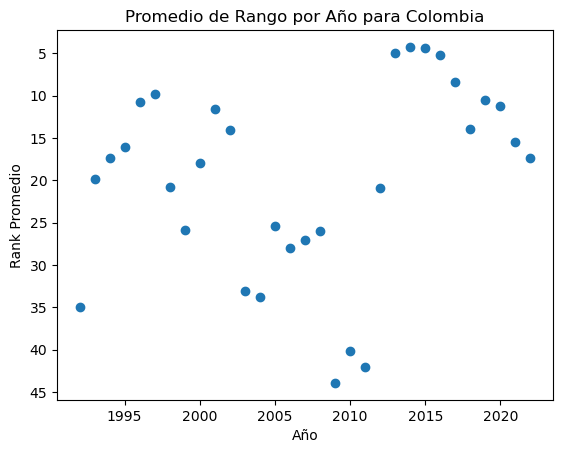

In [325]:
# Sort arrays by ascending average range
sorted_indices = np.argsort(ranks)
years_sorted = years[sorted_indices]
ranks_sorted = ranks[sorted_indices]

# We give the ranges for the graph
plt.scatter(years, ranks)

# We give the labels of the graph
plt.xlabel('Año')
plt.ylabel('Rank Promedio')
plt.title('Promedio de Rango por Año para Colombia')

plt.gca().invert_yaxis()

plt.show()